In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# load the dataset
df = pd.read_csv('Accident.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   6997 non-null   int64  
 1   Accident_Index                               6997 non-null   object 
 2   Location_Easting_OSGR                        6997 non-null   float64
 3   Location_Northing_OSGR                       6997 non-null   float64
 4   Longitude                                    6997 non-null   float64
 5   Latitude                                     6997 non-null   float64
 6   Police_Force                                 6997 non-null   int64  
 7   Accident_Severity                            6997 non-null   int64  
 8   Number_of_Vehicles                           6997 non-null   int64  
 9   Number_of_Casualties                         6997 non-null   int64  
 10  

In [ ]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005.0
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005.0
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005.0
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005.0
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005.0


In [ ]:
# initial dataset shape
df.shape

(6997, 33)

In [ ]:
# find null values
df.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


<Axes: >

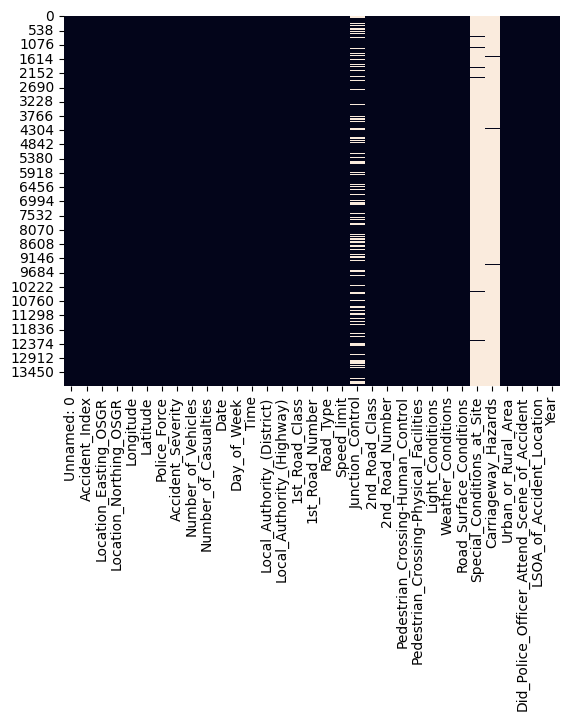

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# handling missing values
# drop columns with too many missing values (more than 1000)
df = df.drop(['Junction_Control', 'Special_Conditions_at_Site', 'Carriageway_Hazards'], axis=1)

In [ ]:
df = df.dropna(subset=['Accident_Severity'])

In [ ]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(
    {"Did_Police_Officer_Attend_Scene_of_Accident":df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()}, inplace=True)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [ ]:
# encode categorical data using Label Encoding
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,4,4,5,5,7,5,1.0,1,1024,2005.0
1,1,1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,3,2,1,0,7,5,1.0,1,1080,2005.0
2,2,2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,2,2,1,0,7,5,1.0,1,1031,2005.0
3,3,3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,2,4,1,0,7,5,1.0,1,1016,2005.0
4,4,4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,2,1,1,5,7,5,1.0,1,1037,2005.0


In [ ]:
features = ['Speed_limit', 'Day_of_Week', 'Weather_Conditions',
            'Road_Surface_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area']

In [ ]:
X = df[features]
y = df['Accident_Severity']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,Speed_limit,Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Urban_or_Rural_Area
3011,30.0,3,5,5,4,1.0
12650,30.0,6,1,0,4,1.0
3143,30.0,4,1,0,2,1.0
12970,30.0,1,1,0,4,1.0
6747,30.0,5,1,0,4,1.0


In [ ]:
X_test.head()

,Speed_limit,Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Urban_or_Rural_Area
7476,30.0,6,1,0,4,1.0
339,30.0,7,1,0,2,1.0
8296,30.0,2,1,0,2,2.0
10328,30.0,2,1,0,4,1.0
4412,30.0,4,1,0,4,1.0


In [ ]:
y_train.head()

,Accident_Severity
3011,3
12650,3
3143,3
12970,2
6747,3


In [ ]:
y_test.head()

,Accident_Severity
7476,3
339,3
8296,3
10328,3
4412,2


In [ ]:
# train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# make predictions and evaluate
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

In [ ]:
accuracy

0.8936627282491945

In [ ]:
confusion_matrix(y_test, pred)

array([[   1,  290],
       [   7, 2495]])

In [ ]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           2       0.12      0.00      0.01       291\n           3       0.90      1.00      0.94      2502\n\n    accuracy                           0.89      2793\n   macro avg       0.51      0.50      0.48      2793\nweighted avg       0.82      0.89      0.85      2793\n'

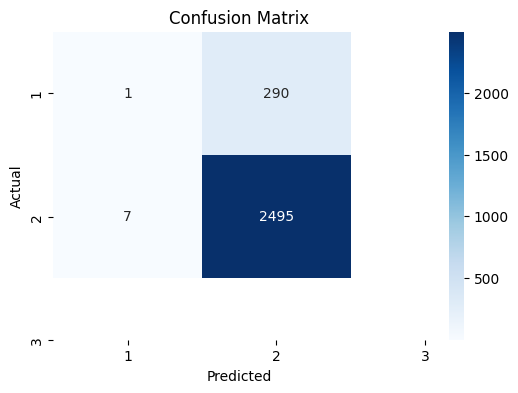

In [ ]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

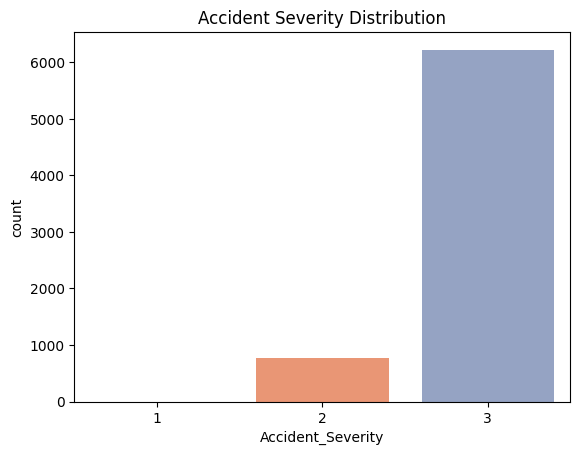

In [ ]:
sns.countplot(x='Accident_Severity', hue='Accident_Severity', data=df, palette='Set2', legend=False)
plt.title("Accident Severity Distribution")
plt.show()

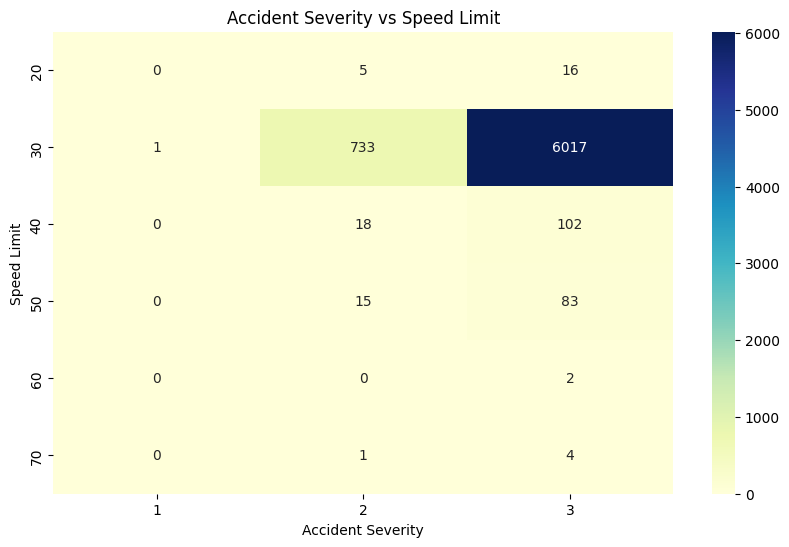

In [ ]:
heatmap_data = df.groupby(['Speed_limit', 'Accident_Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Accident Severity vs Speed Limit')
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit')
plt.show()